## 1. The most Nobel of Prizes
<p><img style="float: right;margin:5px 20px 5px 1px; max-width:250px" src="https://assets.datacamp.com/production/project_441/img/Nobel_Prize.png"></p>
<p>The Nobel Prize is perhaps the world's most well known scientific award. Except for the honor, prestige and substantial prize money the recipient also gets a gold medal showing Alfred Nobel (1833 - 1896) who established the prize. Every year it's given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. The first Nobel Prize was handed out in 1901, and at that time the Prize was very Eurocentric and male-focused, but nowadays it's not biased in any way whatsoever. Surely. Right?</p>
<p>Well, we're going to find out! The Nobel Foundation has made a dataset available of all prize winners from the start of the prize, in 1901, to 2016. Let's load it in and take a look.</p>

In [177]:
#importing required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Reading in the Nobel Prize data
nobel = pd.read_csv('nobel.csv')

# Taking a look at the first several winners
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany


## 2. So, who gets the Nobel Prize?
<p>Just looking at the first couple of prize winners, or Nobel laureates as they are also called, we already see a celebrity: Wilhelm Conrad Röntgen, the guy who discovered X-rays. And actually, we see that all of the winners in 1901 were guys that came from Europe. But that was back in 1901, looking at all winners in the dataset, from 1901 to 2016, which sex and which country is the most commonly represented? </p>
<p>(For <em>country</em>, we will use the <code>birth_country</code> of the winner, as the <code>organization_country</code> is <code>NaN</code> for all shared Nobel Prizes.)</p>

In [178]:
# Display the number of Nobel Prizes handed out between 1901 and 2016
display(len(nobel))

# Display the number of prizes won by male and female recipients.
display(nobel['sex'].value_counts())

# Display the number of prizes won by the top 10 nationalities.
nobel['birth_country'].value_counts().head(10)

911

Male      836
Female     49
Name: sex, dtype: int64

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Russia                       17
Italy                        17
Name: birth_country, dtype: int64

## 3. What are top 10 Nobel Prize winning Countries?
<p>Which countries have won most number of Noble prize over the years.</p> 
<p>Lets find out the top 10 counties to win the Nobel Prize award!</p>

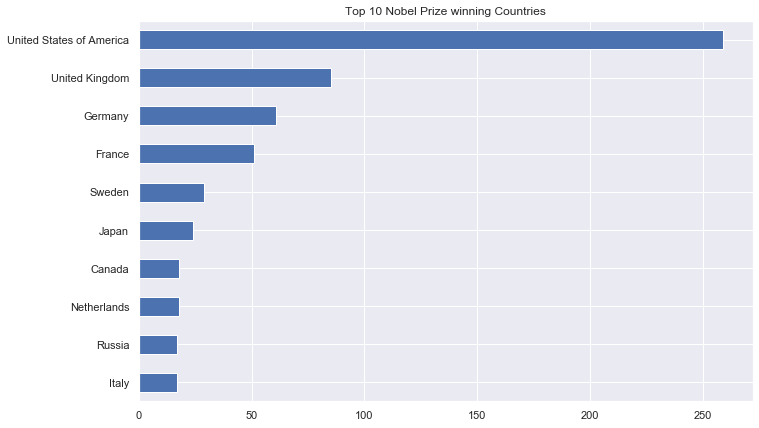

In [179]:
prize_country = nobel['birth_country'].value_counts()
top10 = prize_country[:10] 
top10.plot.barh(title='Top 10 Nobel Prize winning Countries').invert_yaxis()

## 4. USA dominance 
<img style="float: left;margin:5px 20px 5px 1px; max-width:170px"
src="pictures/USA_Flag.png">
<p>Not so surprising perhaps: the most common Nobel laureate between 1901 and 2016 was a man born in the United States of America. But in 1901 all the winners were European. When did the USA start to dominate the Nobel Prize charts?</p>


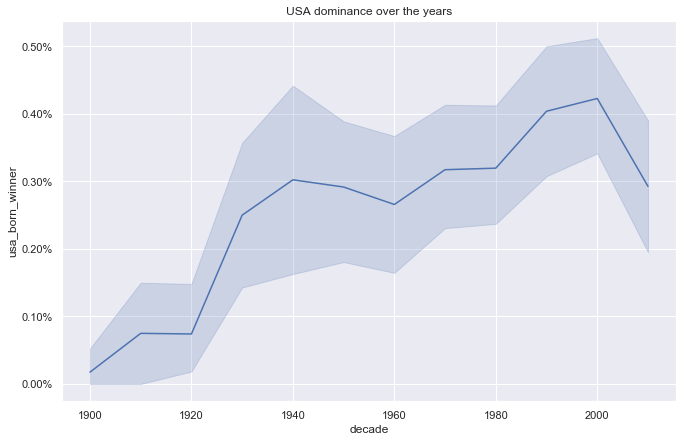

In [221]:
# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country']=='United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.title("USA dominance over the years")
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x='decade', y='usa_born_winner', data=nobel)

# Adding %-formatting to the y-axis
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

####  **USA** became the dominating winner of the Nobel Prize first in the 1930s and had kept the leading position ever since.

## 5. What is the gender of a typical Nobel Prize winner?
<img style="float:left ;margin:5px 20px 5px 1px; max-width:100px"
src="pictures/Male_vs_Female.png">
<br>
<p>One group that was in the lead from the start, and never seems to let go, are <em>men</em>. Maybe it shouldn't come as a shock that there is some imbalance between how many male and female prize winners there are, but how significant is this imbalance?</p>


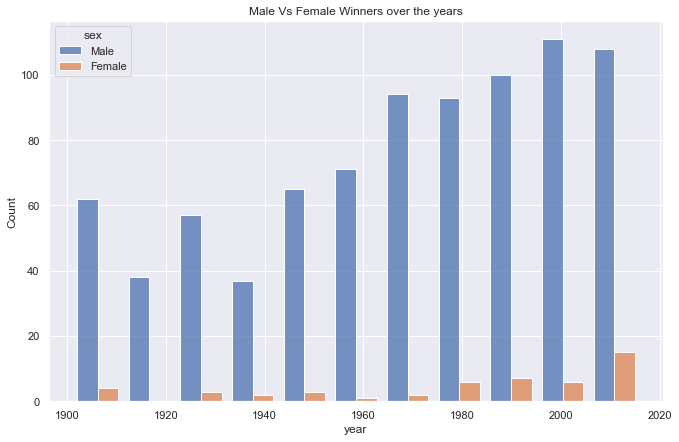

In [222]:
# Calculating number of male vs female winners over the years

nobel['male_winner'] = nobel['sex'] == 'Male'
nobel['female_winner'] = nobel['sex'] == 'Female'
sns.set()
sns.histplot(data=nobel, x="year", hue="sex", multiple="dodge", shrink=0.8)
plt.title("Male Vs Female Winners over the years")
plt.show()

## 6. The first woman to win the Nobel Prize
<p>Who was the first woman to receive a Nobel Prize? And in what category and year?</p>

In [182]:
# Picking out the first woman to win a Nobel Prize
nobel[nobel.sex == 'Female'].nsmallest(1, 'year')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,male_winner,female_winner
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,...,NaN,NaN,NaN,1934-07-04,Sallanches,France,False,1900,False,True


<img style="float: right;margin:5px 20px 5px 1px; max-width:240px"
src="pictures/Marie_Curie.png">
<br>
#### Marie Curie Became the First Woman to Win a Nobel Prize, <br> the First Person to Win Twice,and the Only Person in History <br> to Win in Two Different Sciences.

## 7. What is proportion of female laureates per decade by category?
<p>There is some imbalance between how many male and female prize winners there are, but does it get better or worse within specific prize categories like physics, medicine, literature, etc.?</p>

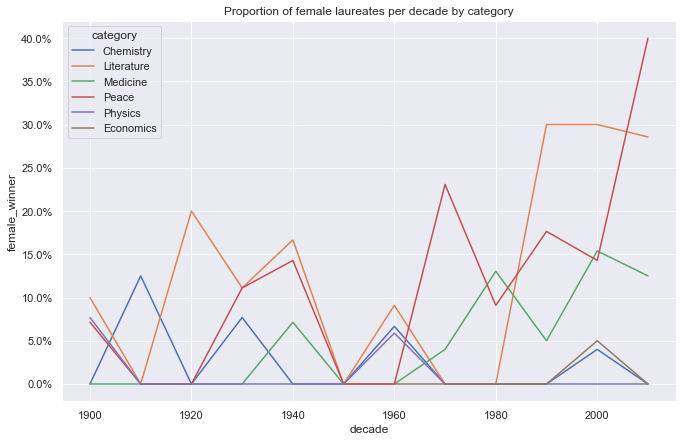

In [183]:
# Calculating the proportion of female laureates per decade by category

prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# Plotting female winners with % winners on the y-axis
ax = sns.lineplot(x='decade', y='female_winner', hue='category', data=prop_female_winners)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
plt.title("Proportion of female laureates per decade by category")
plt.show()

## 8. Which category has been awarded most often? 
<p> Lets find out in which category the laureates have been awarded the most number of times. </p>
<p> We'll make a pie chart to represent percentage of different winning categories . </p>

Medicine      211
Physics       204
Chemistry     175
Peace         130
Literature    113
Economics      78
Name: category, dtype: int64

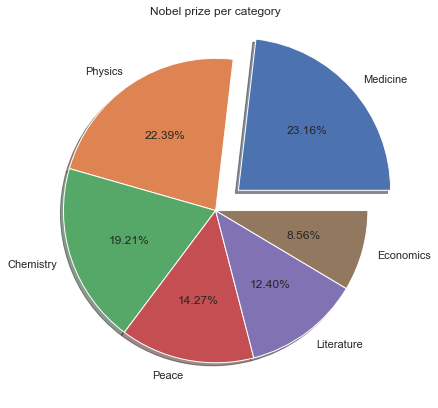

In [184]:
# Calculating number of awards won per category
prize_category = nobel['category'].value_counts()
display(prize_category)
# Plotiing pie chart to represent the data 
myexplode = [0.2, 0, 0, 0, 0 , 0]
plt.pie(prize_category.values , labels = prize_category.index, explode = myexplode,autopct='%1.2f%%', shadow=True)
plt.title("Nobel prize per category")
plt.show()

## 9. Age differences between prize categories
<p>We see that people use to be around 55 when they received the price, but nowadays the average is closer to 65. But there is a large spread in the laureates' ages, and while most are 50+, some are very young.</p>
<p>We also see that the density of points is much high nowadays than in the early 1900s -- nowadays many more of the prizes are shared, and so there are many more winners. We also see that there was a disruption in awarded prizes around the Second World War (1939 - 1945). </p>
<p>Let's look at age trends within different prize categories.</p>

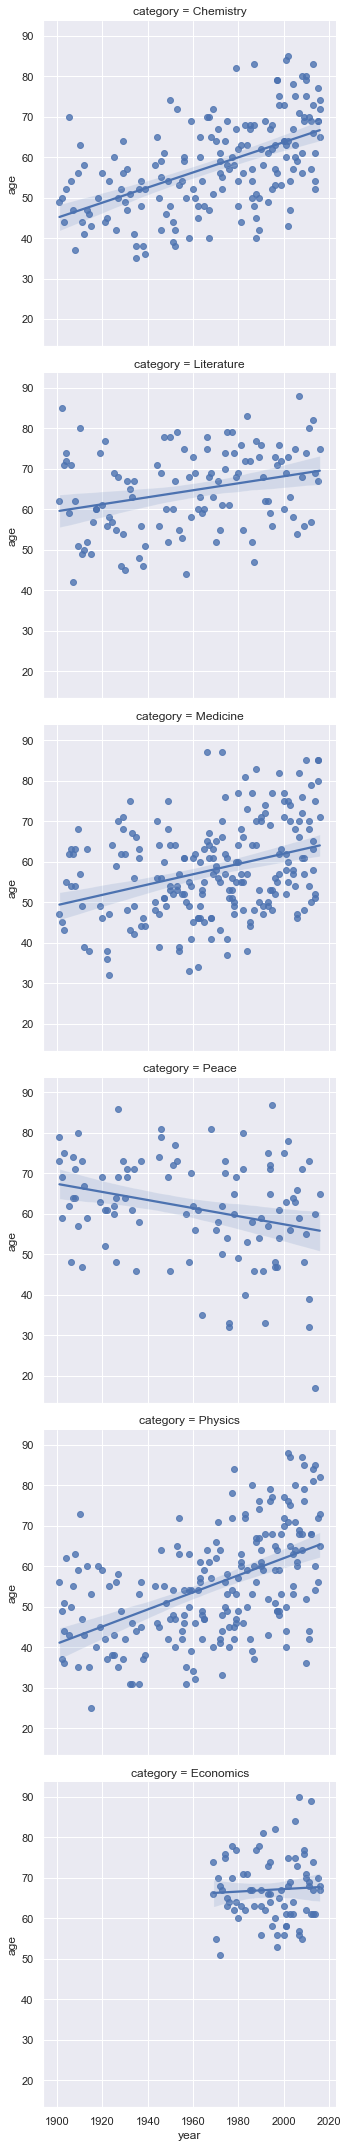

In [185]:
# Converting birth_date from String to datetime
nobel['birth_date'] = pd.to_datetime(nobel['birth_date']).dropna()

# Calculating the age of Nobel Prize winners
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

# Plotting the age of Nobel Prize winners , but separate plots for each type of Nobel Prize
sns.lmplot(x='year', y='age', row='category', data=nobel)

## 10. Multiple winners
<p>For most scientists/writers/activists a Nobel Prize would be the crowning achievement of a long career. But for some people, one is just not enough, and few have gotten it more than once. Who are these lucky few? (Having won no Nobel Prize myself, I'll assume it's just about luck.)</p>

In [188]:
# Selecting the laureates that have received 2 or more prizes.
nobel.groupby('full_name').filter(lambda group: len(group) >= 2).sort_values(by='full_name')[['year','full_name','category','laureate_type','prize_share','prize']]

,year,full_name,category,laureate_type,prize_share,prize
89,1917,Comité international de la Croix Rouge (Intern...,Peace,Organization,1/1,The Nobel Peace Prize 1917
215,1944,Comité international de la Croix Rouge (Intern...,Peace,Organization,1/1,The Nobel Peace Prize 1944
348,1963,Comité international de la Croix Rouge (Intern...,Peace,Organization,1/2,The Nobel Peace Prize 1963
306,1958,Frederick Sanger,Chemistry,Individual,1/1,The Nobel Prize in Chemistry 1958
505,1980,Frederick Sanger,Chemistry,Individual,1/4,The Nobel Prize in Chemistry 1980
298,1956,John Bardeen,Physics,Individual,1/3,The Nobel Prize in Physics 1956
424,1972,John Bardeen,Physics,Individual,1/3,The Nobel Prize in Physics 1972
278,1954,Linus Carl Pauling,Chemistry,Individual,1/1,The Nobel Prize in Chemistry 1954
340,1962,Linus Carl Pauling,Peace,Individual,1/1,The Nobel Peace Prize 1962
19,1903,"Marie Curie, née Sklodowska",Physics,Individual,1/4,The Nobel Prize in Physics 1903


<img style="float:right ;margin:5px 20px 5px 1px; max-width:200px"
src="pictures/Linus_Pauling.png">
#### **Linus Pauling** is the only person to have been awarded two unshared Nobel Prizes – the 1954 Nobel Prize in Chemistry and the 1962 Nobel Peace Prize

# Winners of my country - India
<img style="float:left ;margin:5px 20px 5px 1px; max-width:150px"
src="pictures/Indian_Flag.png">
Countries across the world have their own Nobel laureates. India, a country with more than 1.3 billion citizen and thousands of universities has produced its own fair share of Nobel laureates over the years in all the award categories. These are the Nobel laureates of India .

In [217]:
nobel[nobel.birth_country == "India"][['year','full_name','category','birth_country','birth_city','prize','motivation']]

,year,full_name,category,birth_country,birth_city,prize,motivation
8,1902,Ronald Ross,Medicine,India,Almora,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show..."
75,1913,Rabindranath Tagore,Literature,India,Calcutta,The Nobel Prize in Literature 1913,"""because of his profoundly sensitive, fresh an..."
155,1930,Sir Chandrasekhara Venkata Raman,Physics,India,Tiruchirappalli,The Nobel Prize in Physics 1930,"""for his work on the scattering of light and f..."
387,1968,Har Gobind Khorana,Medicine,India,Raipur,The Nobel Prize in Physiology or Medicine 1968,"""for their interpretation of the genetic code ..."
689,1998,Amartya Sen,Economics,India,Santiniketan,The Sveriges Riksbank Prize in Economic Scienc...,"""for his contributions to welfare economics"""
816,2009,Venkatraman Ramakrishnan,Chemistry,India,"Chidambaram, Tamil Nadu",The Nobel Prize in Chemistry 2009,"""for studies of the structure and function of ..."
884,2014,Kailash Satyarthi,Peace,India,Vidisha,The Nobel Peace Prize 2014,"""for their struggle against the suppression of..."



<img style="float: right;margin:5px 20px 5px 1px; max-width:200px"
src="pictures/Rabindranath Tagore .png">

#### <p>The first **Indian** to receive the Nobel Prize was **Rabindra Nath Tagore** for Literature in 1913 for his poetry collection Gitanjali.</p>
